<a href="https://colab.research.google.com/github/vpolkampally0125/aaru/blob/main/Weighted_Local_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import util as util

from linear_model import LinearModel

In [3]:
x_train, y_train = util.load_dataset('data/ds5_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset('data/ds5_valid.csv', add_intercept=True)
x_test, y_test = util.load_dataset('data/ds5_test.csv', add_intercept=True)

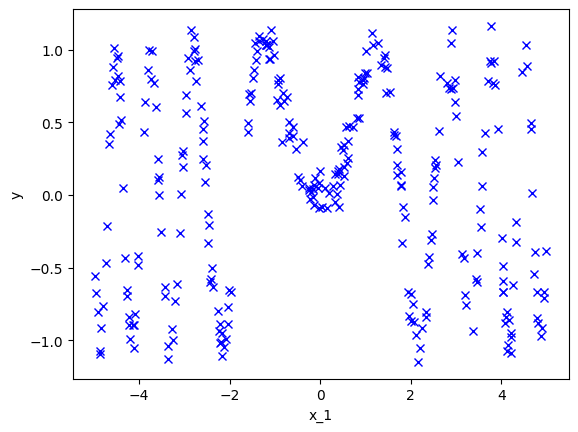

In [4]:
plt.xlabel('x_1')
plt.ylabel('y')
plt.plot(x_train[:,-1], y_train, 'bx', linewidth=2)

In [5]:
class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        :param x: Training example inputs. Shape (m, n).
        :param y: Training example labels. Shape (m,).
        """

        self.x = x
        self.y = y

    def predict(self, x):
        """Make predictions given inputs x.

        :param x: Inputs of shape (l, n).
        :return:  Outputs of shape (l,).
        """

        l, n = x.shape
        y_pred = np.zeros(l)

        for i in range(l):
            # Reshape the input x by adding an additional dimension so that it can broadcast
            w_vector = np.exp(- np.linalg.norm(self.x - x[i], ord=2, axis=1)**2 / (2 * self.tau**2))

            # Turn the weights into diagonal matrices, each corresponds to a single input. Shape (m, m)
            w = np.diag(w_vector)

            # Compute theta for each input x^(i). Shape (n,)
            theta = np.linalg.inv(self.x.T @ w @ self.x) @ self.x.T @ w @ self.y
            y_pred[i] = x[i] @ theta

        return y_pred

In [6]:
clf = LocallyWeightedLinearRegression(tau=0.5)
clf.fit(x_train, y_train)

In [7]:
def plot(x, y_label, y_pred, title):
    plt.figure()
    plt.plot(x[:,-1], y_label, 'bx', label='label')
    plt.plot(x[:,-1], y_pred, 'ro', label='prediction')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='upper left')

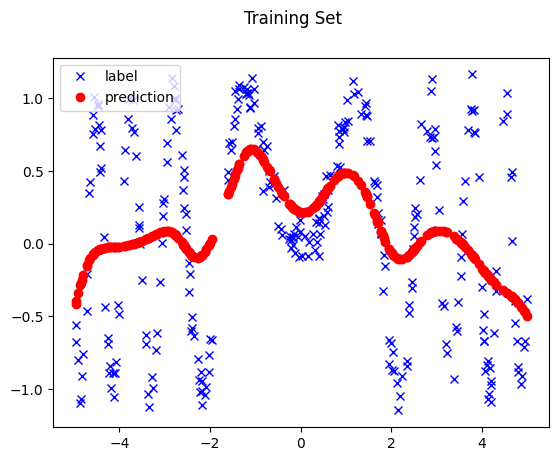

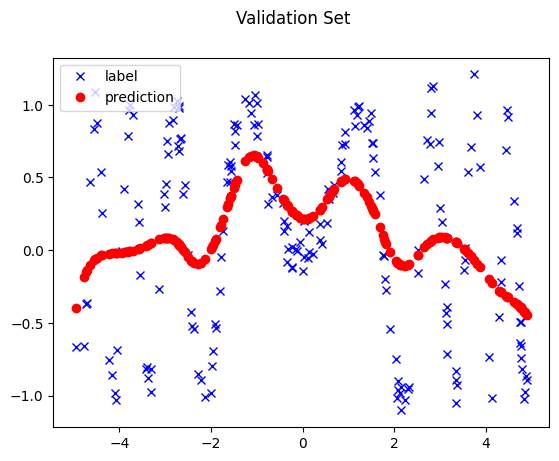

In [8]:
y_train_pred = clf.predict(x_train)
plot(x_train, y_train, y_train_pred, 'Training Set')

y_valid_pred = clf.predict(x_valid)
plot(x_valid, y_valid, y_valid_pred, 'Validation Set')

Tau = 0.05 achieves the lowest MSE on the validation set.


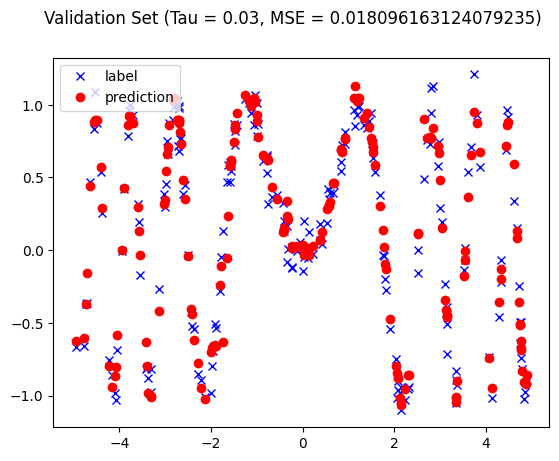

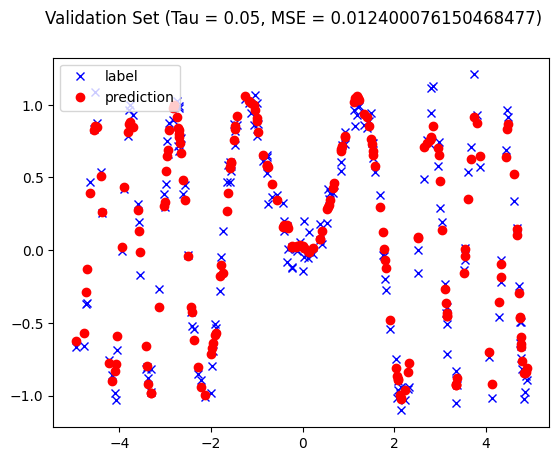

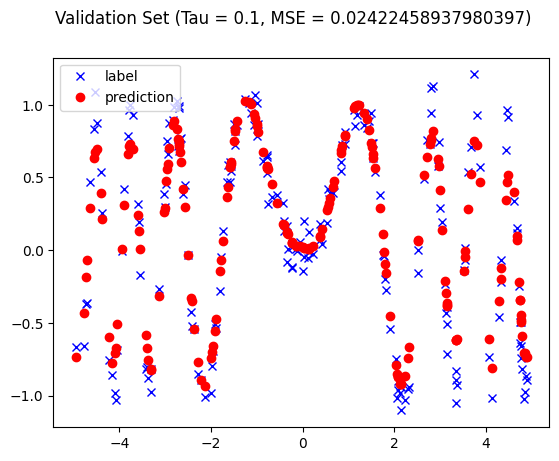

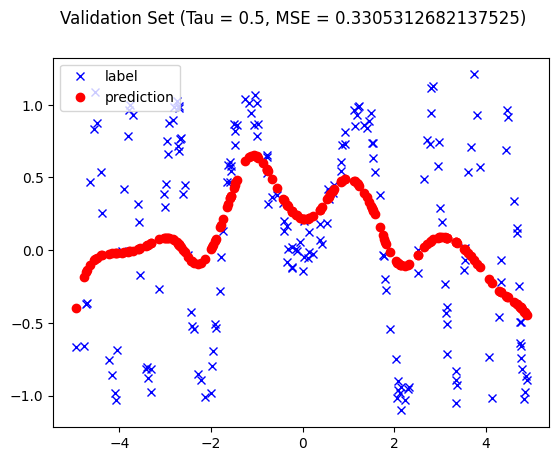

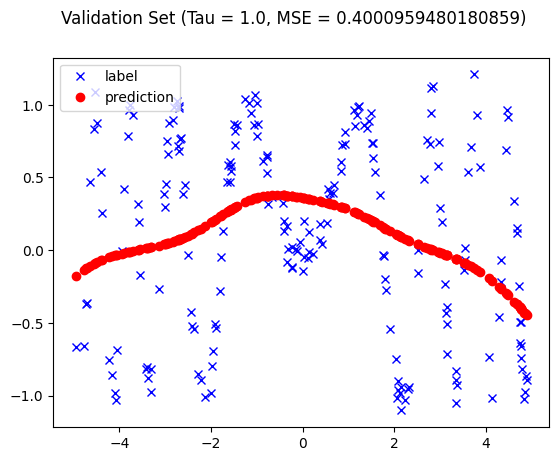

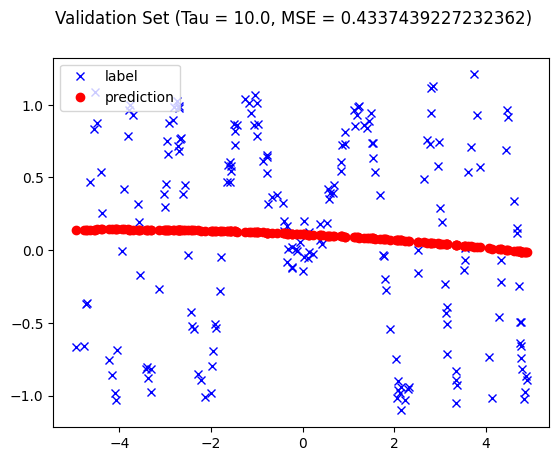

In [9]:
taus = [3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1]

lowest_mse = math.inf
best_tau = taus[0]

for tau in taus:
    clf = LocallyWeightedLinearRegression(tau)
    clf.fit(x_train, y_train)
    y_valid_pred = clf.predict(x_valid)

    mse = np.mean((y_valid_pred - y_valid)**2)
    if mse < lowest_mse:
        lowest_mse = mse
        best_tau = tau

    plot(x_valid, y_valid, y_valid_pred, f'Validation Set (Tau = {tau}, MSE = {mse})')

print(f'Tau = {best_tau} achieves the lowest MSE on the validation set.')

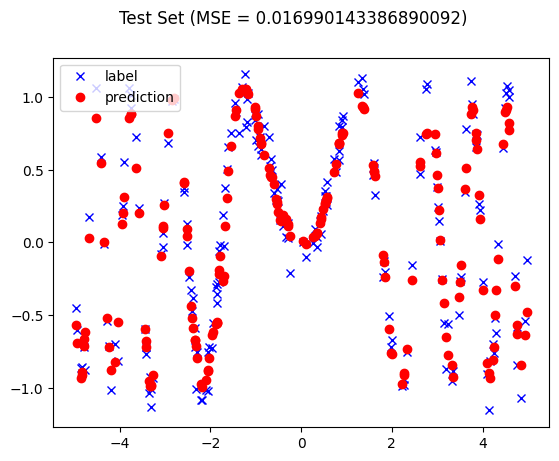

In [10]:
clf = LocallyWeightedLinearRegression(tau=0.05)
clf.fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

plot(x_test, y_test, y_test_pred, f'Test Set (MSE = {np.mean((y_test_pred - y_test)**2)})')
##Looks like tau=0.5 yields the best model